# NetworkX

> NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

* Provides classes that let us treat graphs as high-level python objects
* Implements many well-known algorithms on top of these
* Shortest-path
* Network flow
* Clustering
* ... and many more
* Visualization using matplotlib
* (Advanced) network analysis
* Tools for (de-)serialization

# NetworkX - Concepts

Graphs
comprise:
*Graph
object
*Nodes(arbitrary
values / types)
*Edges(directed and undirected)
*Attributes(arbitrary data, associated with `graphs`, `nodes`, `edges`)


| Networkx Class | Type       | Self-loops allowed | Parallel edges allowed |
| :- | :-: | :-: | :-: |
| `Graph()`          | undirected | Yes                | No                     |
| `DiGraph()`        | directed   | Yes                | No                     |
| `MultiGraph()`     | undirected | Yes                | Yes                    |
| `MultiDiGraph()`   | directed   | Yes                | Yes                    |

In [1]:
import networkx as nx

In [2]:
# Create an empty graph
G = nx.Graph()
display(G)

In [3]:
# Add some nodes
G.add_node('Max')
# Add nodes from iterable
G.add_nodes_from(['Antonio'])
# Can be any hashable (https://docs.python.org/3/glossary.html#term-hashable) type
mfms_team = frozenset(['Antonio', 'Max'])
G.add_node(mfms_team)

print(G.nodes)

['Max', 'Antonio', frozenset({'Max', 'Antonio'})]


In [15]:
#Add edges
G.add_edge('Antonio', 'Max')
G.add_edges_from([('Antonio', mfms_team), ('Max', mfms_team)])

G.add_edge('A', 'Antonio') # Be careful: Non-existent nodes are added automatically
print("edges: ", G.edges)
print("nodes: ",G.nodes)

edges:  [('Max', 'Antonio'), ('Max', frozenset({'Antonio', 'Max'})), ('Antonio', frozenset({'Antonio', 'Max'})), ('Antonio', 'A')]
nodes:  ['Max', 'Antonio', frozenset({'Antonio', 'Max'}), 'A']


In [7]:
# Print overview of graph
print(G)

Graph with 3 nodes and 0 edges


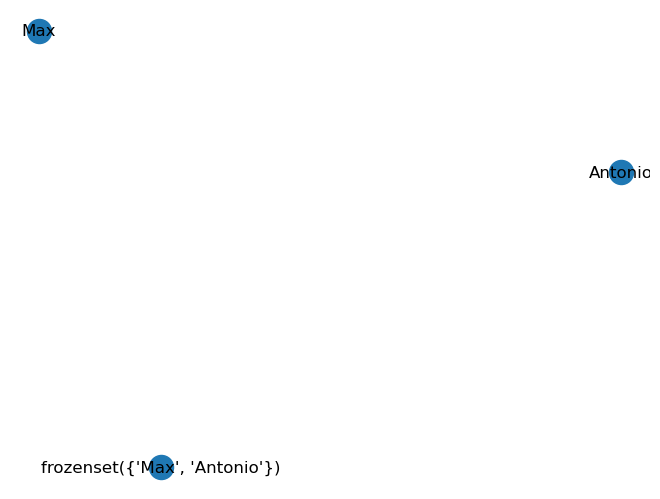

In [8]:
#For small graphs, drawing works well too:
import matplotlib.pyplot as plt
plt.tight_layout()
nx.draw(G, with_labels=True) #if we wanna set the position, nx.draw(G, pos= , with_labels=True)

In [9]:
# G.adj and G.degrees
print('Adjacency lists of nodes: ', G.adj, "\n")
print('Neighborhood', list(G.neighbors('Antonio')), 'vs Adjacency', G.adj['Antonio'],"\n")
print('Degrees of nodes in G: ', G.degree, '<=>', [(node, len(neighbors)) for node, neighbors in G.adj.items()])

Adjacency lists of nodes:  {'Max': {}, 'Antonio': {}, frozenset({'Max', 'Antonio'}): {}} 

Neighborhood [] vs Adjacency {} 

Degrees of nodes in G:  [('Max', 0), ('Antonio', 0), (frozenset({'Max', 'Antonio'}), 0)] <=> [('Max', 0), ('Antonio', 0), (frozenset({'Max', 'Antonio'}), 0)]


In [10]:
# Look like lists, but behave like dictionaries
print(G.nodes['Antonio']) # access attributes in node Antonio
print(G.edges['Antonio', 'Max']) # access attributes in edge Antonio Max

{}


KeyError: 'Max'

In [38]:
# Store role=Lecturer on node Max
G.nodes['Max']['role'] = 'Lecturer'
print(G.nodes['Max'])

# Add value 'supervises' to key 'relationship' of edge dict.
G.edges['Max', 'Antonio']['relationship'] = 'supervises'
G.edges['Max', 'Antonio']['years_together'] = 2
print(G.edges['Max', 'Antonio'])

{'role': 'Lecturer'}
{'relationship': 'supervises', 'years_together': 2}


In [11]:
G_directed = nx.DiGraph()
G_directed.add_nodes_from(['Max', 'Antonio'])
G_directed.add_edge('Max', 'Antonio', relationship='supervises', they_like_eachother = true)
print(G_directed.edges['Max', 'Antonio'])
# We get a KeyError here as this edge does not exist
print(G_directed.edges['Antonio', 'Max'])

NameError: name 'true' is not defined